# 

`.read_csv()` 를 사용해서 외부 CSV 파일 자료를 가져온다.

```
read_csv(fp, encoding='', usecols=[], names=[], sep='')
    - usecols : 파싱 결과의 컬럼만을 반환
    - names: 컬럼 이름을 제공
    - squeeze: 파싱 데이터가 한 컬럼만 있으면 Series 객체 반환
    - sep: '\t', ',', '::'
```


`.read_excel()`
 - .xls
 - .xlsx : xlrd 모듈


In [2]:
import pandas as pd

df_bond = pd.read_csv("jamesbond.csv")
df_bond.head(3)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


### 데이터 형태

In [3]:
df_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               26 non-null     object 
 1   Year               26 non-null     int64  
 2   Actor              26 non-null     object 
 3   Director           26 non-null     object 
 4   Box Office         26 non-null     float64
 5   Budget             26 non-null     float64
 6   Bond Actor Salary  18 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


In [4]:
df_bond.isna().sum()

Film                 0
Year                 0
Actor                0
Director             0
Box Office           0
Budget               0
Bond Actor Salary    8
dtype: int64

#### iteration 테스트
 - for 반복

In [5]:
for i in df_bond:
    print(i)

Film
Year
Actor
Director
Box Office
Budget
Bond Actor Salary


In [6]:
df_bond.columns

Index(['Film', 'Year', 'Actor', 'Director', 'Box Office', 'Budget',
       'Bond Actor Salary'],
      dtype='object')

In [7]:
df_bond.columns = ['영화', '년도', '배우', '감독', '순위', '예산', '개런티']
df_bond.head(3)

,영화,년도,배우,감독,순위,예산,개런티
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


In [8]:
for i in df_bond.columns[1:]:
    print(i)

년도
배우
감독
순위
예산
개런티


In [9]:
for i in df_bond.columns[::-1]:
    print(i)

개런티
예산
순위
감독
배우
년도
영화


### 새 데이터

In [12]:
df = pd.DataFrame([['세이 두바이', 2020, '홍길동', '이순신', 300, 100.0, 10]], columns=df_bond.columns)
df

,영화,년도,배우,감독,순위,예산,개런티
0,세이 두바이,2020,홍길동,이순신,300,100.0,10


##### append()

In [13]:
df_bond.append(df).tail()

,영화,년도,배우,감독,순위,예산,개런티
22,Casino Royale,2006,Daniel Craig,Martin Campbell,581.5,145.3,3.3
23,Quantum of Solace,2008,Daniel Craig,Marc Forster,514.2,181.4,8.1
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN
0,세이 두바이,2020,홍길동,이순신,300.0,100.0,10.0


In [14]:
df_bond.append(df, ignore_index=True).tail()

,영화,년도,배우,감독,순위,예산,개런티
22,Casino Royale,2006,Daniel Craig,Martin Campbell,581.5,145.3,3.3
23,Quantum of Solace,2008,Daniel Craig,Marc Forster,514.2,181.4,8.1
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN
26,세이 두바이,2020,홍길동,이순신,300.0,100.0,10.0


In [15]:
df_bond = df_bond.append(df, ignore_index=True)
df_bond.tail(3)

,영화,년도,배우,감독,순위,예산,개런티
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN
26,세이 두바이,2020,홍길동,이순신,300.0,100.0,10.0


#### concat()

In [17]:
df = pd.DataFrame([['세이 두바이2', 2020, '홍길동1', '이순신1', 300, 100.0, 10]], columns=df_bond.columns)
df

,영화,년도,배우,감독,순위,예산,개런티
0,세이 두바이2,2020,홍길동1,이순신1,300,100.0,10


In [18]:
pd.concat([df_bond, df], ignore_index=True).tail()

,영화,년도,배우,감독,순위,예산,개런티
23,Quantum of Solace,2008,Daniel Craig,Marc Forster,514.2,181.4,8.1
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN
26,세이 두바이,2020,홍길동,이순신,300.0,100.0,10.0
27,세이 두바이2,2020,홍길동1,이순신1,300.0,100.0,10.0


#### 컬럼 추가

In [23]:
df_bond['Award'] = None
df_bond.head()

,영화,년도,배우,감독,순위,예산,개런티,Award
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,None
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,None
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,None
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,None
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,None


In [24]:
df_bond.insert(4, column='Contry', value='no')
df_bond.head()

,영화,년도,배우,감독,Contry,순위,예산,개런티,Award
0,Dr. No,1962,Sean Connery,Terence Young,no,448.8,7.0,0.6,None
1,From Russia with Love,1963,Sean Connery,Terence Young,no,543.8,12.6,1.6,None
2,Goldfinger,1964,Sean Connery,Guy Hamilton,no,820.4,18.6,3.2,None
3,Thunderball,1965,Sean Connery,Terence Young,no,848.1,41.9,4.7,None
4,Casino Royale,1967,David Niven,Ken Hughes,no,315.0,85.0,NaN,None


#### drop() & del

In [26]:
del df_bond['Contry']
df_bond.head(3)

,영화,년도,배우,감독,순위,예산,개런티,Award
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,None
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,None
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,None


In [27]:
df_bond.drop(['Award'], axis=1)  # axis: 0: 행, 1: 컬럼

,영화,년도,배우,감독,순위,예산,개런티
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN


In [ ]:
#df_bond = df_bond.drop(['Award'], axis=1)

In [28]:
df_bond.drop(['Award'], axis=1, inplace=True)

In [29]:
df_bond.head(3)

,영화,년도,배우,감독,순위,예산,개런티
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


### Broadcasting...

 - add, sub, mul, div...
 - mean,,,,,

In [34]:
df_bond['예산'] * 1000

0       7000.0
1      12600.0
2      18600.0
3      41900.0
4      85000.0
5      59900.0
6      37300.0
7      34700.0
8      30800.0
9      27700.0
10     45100.0
11     91500.0
12     60200.0
13     86000.0
14     53900.0
15     54500.0
16     68800.0
17     56700.0
18     76900.0
19    133900.0
20    158300.0
21    154200.0
22    145300.0
23    181400.0
24    170200.0
25    206300.0
26    100000.0
Name: 예산, dtype: float64

In [33]:
df_bond['예산'].mul(1000)

0       7000.0
1      12600.0
2      18600.0
3      41900.0
4      85000.0
5      59900.0
6      37300.0
7      34700.0
8      30800.0
9      27700.0
10     45100.0
11     91500.0
12     60200.0
13     86000.0
14     53900.0
15     54500.0
16     68800.0
17     56700.0
18     76900.0
19    133900.0
20    158300.0
21    154200.0
22    145300.0
23    181400.0
24    170200.0
25    206300.0
26    100000.0
Name: 예산, dtype: float64

In [35]:
df_bond['예산(원화)'] = df_bond['예산'] * 1000
df_bond.head(3)

,영화,년도,배우,감독,순위,예산,개런티,예산(원화)
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,7000.0
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,12600.0
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,18600.0


### 인덱싱

In [37]:
#df_bond['예산']
df_bond.예산.head(3)

0     7.0
1    12.6
2    18.6
Name: 예산, dtype: float64

In [39]:
df_bond['예산'] < 10.0

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
Name: 예산, dtype: bool

In [38]:
df_bond[df_bond['예산'] < 10.0]

,영화,년도,배우,감독,순위,예산,개런티,예산(원화)
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,7000.0


In [40]:
df_bond[df_bond['배우'].str.match('Daniel Craig')]

,영화,년도,배우,감독,순위,예산,개런티,예산(원화)
22,Casino Royale,2006,Daniel Craig,Martin Campbell,581.5,145.3,3.3,145300.0
23,Quantum of Solace,2008,Daniel Craig,Marc Forster,514.2,181.4,8.1,181400.0
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5,170200.0
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN,206300.0


In [41]:
director = ['Lewis Gilbert', 'John Glen', 'Martin Campbell']
df_bond[df_bond.isin(director)]

,영화,년도,배우,감독,순위,예산,개런티,예산(원화)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Lewis Gilbert,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_bond.loc[:, ['예산']].head(3)

,예산
0,7.0
1,12.6
2,18.6


In [46]:
df_bond.loc[10:20, ['년도']].head(3)

,년도
10,1977
11,1979
12,1981


### groupby()


값은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용하는 것이 groupby 로 **"예를 들어 도시(city) 별로 가격(price) 평균을 구하고 싶은 경우 다음과 같이 groupby를 사용하여 평균값을 구할 수 있습니다."**

[DataFrame.groupby()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby)로 인덱스를 설정하고 원하는 컬럼을 얻을 수 있다. 반환은 **GroupBy** 객체를 반환한다.

```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, 
                  group_keys=True, squeeze=False, observed=False, **kwargs)
```
      - return: GroupBy instance

#### GroupBy 클래스 메서드

- size, count: 그룹 데이터의 갯수
- mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
- sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
- first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터


In [47]:
df_bond.head(3)

,영화,년도,배우,감독,순위,예산,개런티,예산(원화)
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,7000.0
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,12600.0
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,18600.0


In [50]:
df_bond.groupby('년도').head()

,영화,년도,배우,감독,순위,예산,개런티,예산(원화)
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,7000.0
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,12600.0
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,18600.0
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,41900.0
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,85000.0
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4,59900.0
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6,37300.0
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8,34700.0
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN,30800.0
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN,27700.0


In [51]:
df_bond.groupby(['영화','배우']).head()

,영화,년도,배우,감독,순위,예산,개런티,예산(원화)
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6,7000.0
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6,12600.0
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,18600.0
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,41900.0
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN,85000.0
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4,59900.0
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6,37300.0
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8,34700.0
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NaN,30800.0
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NaN,27700.0


In [58]:
df_bond.groupby('영화')[['개런티','예산']]

In [60]:
df_bond.groupby('영화')[['개런티','예산']].head()

,개런티,예산
0,0.6,7.0
1,1.6,12.6
2,3.2,18.6
3,4.7,41.9
4,NaN,85.0
5,4.4,59.9
6,0.6,37.3
7,5.8,34.7
8,NaN,30.8
9,NaN,27.7


In [61]:
df_bond.groupby('영화')[['개런티','예산']].last()

,개런티,예산
영화,,
A View to a Kill,9.1,54.5
Casino Royale,3.3,145.3
Diamonds Are Forever,5.8,34.7
Die Another Day,17.9,154.2
Dr. No,0.6,7.0
For Your Eyes Only,NaN,60.2
From Russia with Love,1.6,12.6
GoldenEye,5.1,76.9
Goldfinger,3.2,18.6


In [62]:
df_bond.groupby('배우').count()

,영화,년도,감독,순위,예산,개런티,예산(원화)
배우,,,,,,,
Daniel Craig,4,4,4,4,4,3,4
David Niven,1,1,1,1,1,0,1
George Lazenby,1,1,1,1,1,1,1
Pierce Brosnan,4,4,4,4,4,4,4
Roger Moore,7,7,7,7,7,2,7
Sean Connery,7,7,7,7,7,6,7
Timothy Dalton,2,2,2,2,2,2,2
홍길동,1,1,1,1,1,1,1


In [63]:
df_bond.groupby('배우').sum()

,년도,순위,예산,개런티,예산(원화)
배우,,,,,
Daniel Craig,8041,2765.9,703.2,25.9,703200.0
David Niven,1967,315.0,85.0,0.0,85000.0
George Lazenby,1969,291.5,37.3,0.6,37300.0
Pierce Brosnan,7993,1886.6,523.3,46.5,523300.0
Roger Moore,13852,2960.7,363.7,16.9,363700.0
Sean Connery,13775,3997.8,260.7,20.3,260700.0
Timothy Dalton,3976,564.4,125.5,13.1,125500.0
홍길동,2020,300.0,100.0,10.0,100000.0


In [66]:
df_bond.groupby('배우')['영화'].unique()

배우
Daniel Craig      [Casino Royale, Quantum of Solace, Skyfall, Sp...
David Niven                                         [Casino Royale]
George Lazenby                    [On Her Majesty's Secret Service]
Pierce Brosnan    [GoldenEye, Tomorrow Never Dies, The World Is ...
Roger Moore       [Live and Let Die, The Man with the Golden Gun...
Sean Connery      [Dr. No, From Russia with Love, Goldfinger, Th...
Timothy Dalton              [The Living Daylights, Licence to Kill]
홍길동                                                        [세이 두바이]
Name: 영화, dtype: object

In [67]:
df_bond.groupby(['영화','배우'])['개런티'].sum()

영화                               배우            
A View to a Kill                 Roger Moore        9.1
Casino Royale                    Daniel Craig       3.3
                                 David Niven        0.0
Diamonds Are Forever             Sean Connery       5.8
Die Another Day                  Pierce Brosnan    17.9
Dr. No                           Sean Connery       0.6
For Your Eyes Only               Roger Moore        0.0
From Russia with Love            Sean Connery       1.6
GoldenEye                        Pierce Brosnan     5.1
Goldfinger                       Sean Connery       3.2
Licence to Kill                  Timothy Dalton     7.9
Live and Let Die                 Roger Moore        0.0
Moonraker                        Roger Moore        0.0
Never Say Never Again            Sean Connery       0.0
Octopussy                        Roger Moore        7.8
On Her Majesty's Secret Service  George Lazenby     0.6
Quantum of Solace                Daniel Craig       8.1


In [72]:
df_bond.groupby('영화')[['예산']].agg([max, min])

예산       
                                   max    min
영화                                           
A View to a Kill                  54.5   54.5
Casino Royale                    145.3   85.0
Diamonds Are Forever              34.7   34.7
Die Another Day                  154.2  154.2
Dr. No                             7.0    7.0
For Your Eyes Only                60.2   60.2
From Russia with Love             12.6   12.6
GoldenEye                         76.9   76.9
Goldfinger                        18.6   18.6
Licence to Kill                   56.7   56.7
Live and Let Die                  30.8   30.8
Moonraker                         91.5   91.5
Never Say Never Again             86.0   86.0
Octopussy                         53.9   53.9
On Her Majesty's Secret Service   37.3   37.3
Quantum of Solace                181.4  181.4
Skyfall                          170.2  170.2
Spectre                          206.3  206.3
The Living Daylights              68.8   68.8
The Man with the Golden Gun       27.7   27.7
The Spy Who Loved Me              45.1   45.1
The World Is Not Enough          158.3  158.3
Thunderball                       41.9   41.9
Tomorrow Never Dies              133.9  133.9
You Only Live Twice               59.9   59.9
세이 두바이                           100.0  100.0

### 결측치

In [73]:
df_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화      27 non-null     object 
 1   년도      27 non-null     int64  
 2   배우      27 non-null     object 
 3   감독      27 non-null     object 
 4   순위      27 non-null     float64
 5   예산      27 non-null     float64
 6   개런티     19 non-null     float64
 7   예산(원화)  27 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ KB


In [74]:
df_bond.isna().sum()

영화        0
년도        0
배우        0
감독        0
순위        0
예산        0
개런티       8
예산(원화)    0
dtype: int64

In [78]:
df_bond['개런티'] = df_bond.fillna(0)

In [79]:
df_bond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화      27 non-null     object 
 1   년도      27 non-null     int64  
 2   배우      27 non-null     object 
 3   감독      27 non-null     object 
 4   순위      27 non-null     float64
 5   예산      27 non-null     float64
 6   개런티     27 non-null     object 
 7   예산(원화)  27 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.8+ KB


### plot

In [83]:

df_bond = pd.read_csv("jamesbond.csv")
df_bond.head(3)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


In [84]:
df_bond.head(3)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


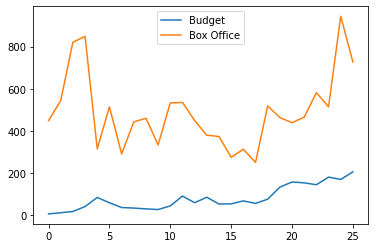

In [92]:
import matplotlib.pyplot as plt

df_bond[['Budget','Box Office']].plot()
plt.show()